# Decision Tree

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [4]:
# 1. Load the dataset
data = pd.read_csv('/heart_disease.csv')


In [5]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,normal,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,normal,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,reversable defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [6]:
# 2. Exploratory Data Analysis (EDA)
# Check for missing values and data types
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB
None


In [7]:
print(data.describe())

              age    trestbps        chol      thalch     oldpeak         num
count  908.000000  908.000000  908.000000  908.000000  846.000000  908.000000
mean    53.791850  133.430617  201.484581  135.957048    0.891253    1.008811
std      9.158031   20.401608  112.097949   26.804929    1.093875    1.144436
min     29.000000    0.000000    0.000000   60.000000   -2.600000    0.000000
25%     47.750000  120.000000  176.750000  118.000000    0.000000    0.000000
50%     54.000000  130.000000  224.000000  138.000000    0.500000    1.000000
75%     60.000000  144.000000  270.000000  156.000000    1.500000    2.000000
max     77.000000  200.000000  603.000000  202.000000    6.200000    4.000000


In [8]:
print(data.isnull().sum())

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64


<Figure size 1500x1000 with 0 Axes>

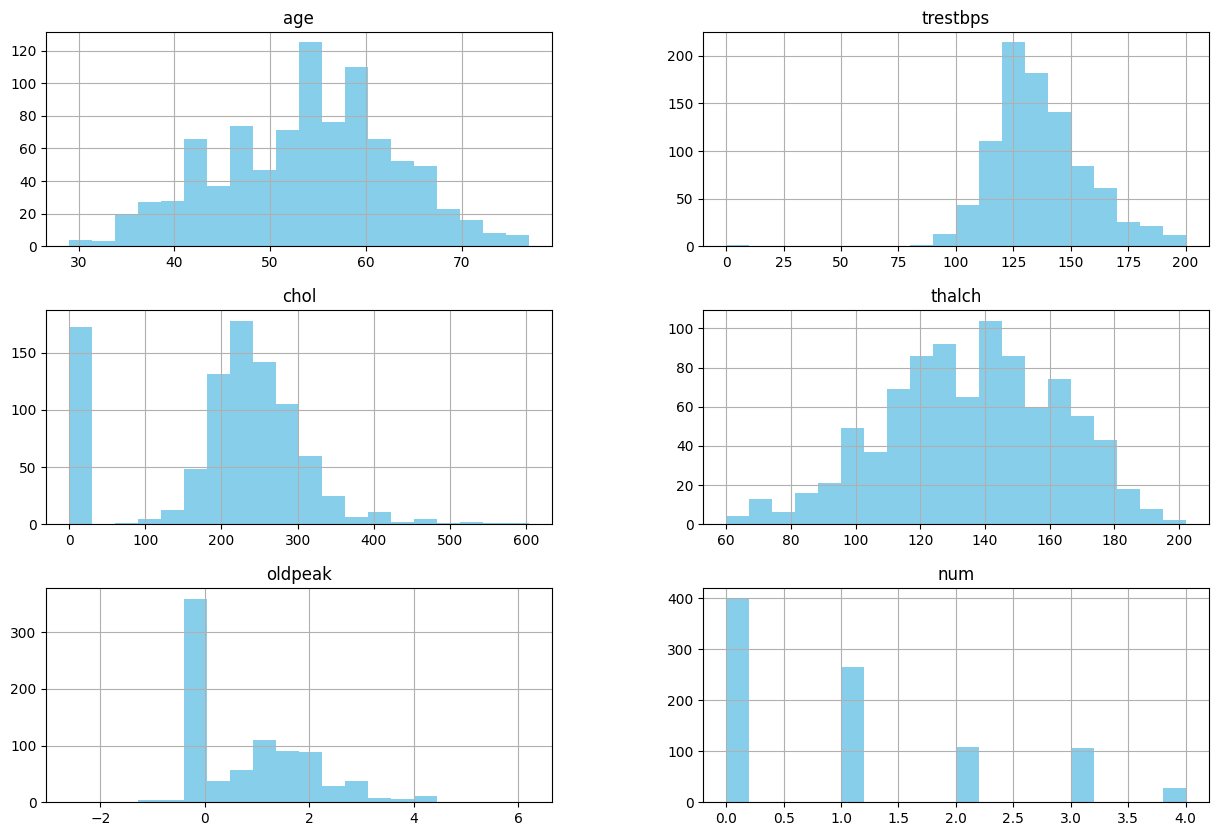

In [9]:
# Visualize distribution of features
plt.figure(figsize=(15, 10))
data.hist(bins=20, figsize=(15, 10), color='skyblue')
plt.show()

In [10]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding on a specific column, e.g., 'Gender'
data['sex'] = label_encoder.fit_transform(data['sex'])

In [14]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=[['typical angina', 'atypical angina', 'asymptomatic','non-anginal']])
data[['cp']] = ordinal_encoder.fit_transform(data[['cp']])

In [15]:
ordinal_encoder = OrdinalEncoder(categories=[['lv hypertrophy','normal','st-t abnormality']])
data[['restecg']] = ordinal_encoder.fit_transform(data[['restecg']])

In [ ]:
ordinal_encoder = OrdinalEncoder(categories=[['downsloping','flat','upsloping']])
data[['slope']] = ordinal_encoder.fit_transform(data[['slope']])

In [18]:
ordinal_encoder = OrdinalEncoder(categories=[['fixed defect','normal','reversable defect']])
data[['thal']] = ordinal_encoder.fit_transform(data[['thal']])

In [25]:
label_encoder = LabelEncoder()

# Apply label encoding on a specific column, e.g., 'Gender'
data['fbs'] = label_encoder.fit_transform(data['fbs'])

In [28]:
label_encoder = LabelEncoder()

# Apply label encoding on a specific column, e.g., 'Gender'
data['exang'] = label_encoder.fit_transform(data['exang'])

In [29]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,0.0,145,233,1,0.0,150,0,2.3,0.0,0.0,0
1,41,1,1.0,135,203,0,1.0,132,0,0.0,1.0,0.0,0
2,57,1,2.0,140,192,0,1.0,148,0,0.4,1.0,0.0,0
3,52,1,0.0,118,186,0,0.0,190,0,0.0,1.0,0.0,0
4,57,1,2.0,110,201,0,1.0,126,1,1.5,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,2.0,125,0,0,1.0,120,0,1.5,2.0,1.0,4
904,62,1,2.0,166,170,0,2.0,120,1,3.0,1.0,1.0,4
905,56,1,3.0,170,0,0,0.0,123,1,2.5,0.0,2.0,4
906,56,1,3.0,144,208,1,2.0,105,2,NaN,0.0,0.0,4


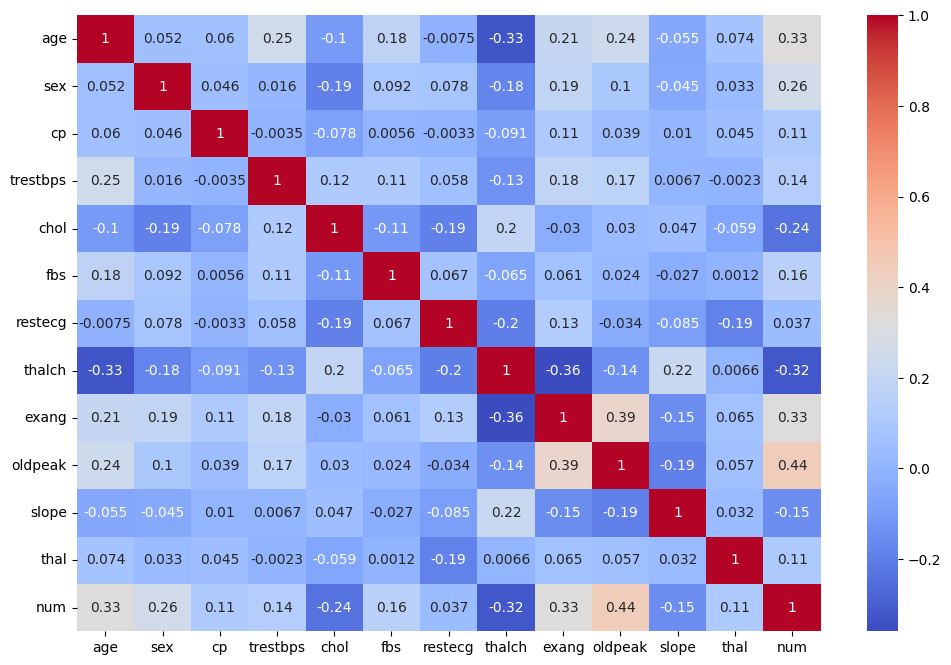

In [30]:
# Correlation matrix to identify relationships between features
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [31]:
# 3. Feature Engineering
# Convert target to binary: 0 for no heart disease, 1 for heart disease presence
data['target'] = data['num'].apply(lambda x: 1 if x > 0 else 0)
data.drop(columns=['num'], inplace=True)

In [32]:
# Splitting data into features and target
X = data.drop(columns=['target'])
y = data['target']

In [33]:
# 4. Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# 5. Decision Tree Classification
# Initialize Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
# Train the model
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [35]:
# Predictions and Evaluation
y_pred = dt_classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6868131868131868
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.69      0.68        89
           1       0.70      0.69      0.69        93

    accuracy                           0.69       182
   macro avg       0.69      0.69      0.69       182
weighted avg       0.69      0.69      0.69       182

Confusion Matrix:
 [[61 28]
 [29 64]]


In [36]:
# ROC-AUC score
y_pred_proba = dt_classifier.predict_proba(X_test)[:, 1]
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))

ROC-AUC Score: 0.6867826507188595


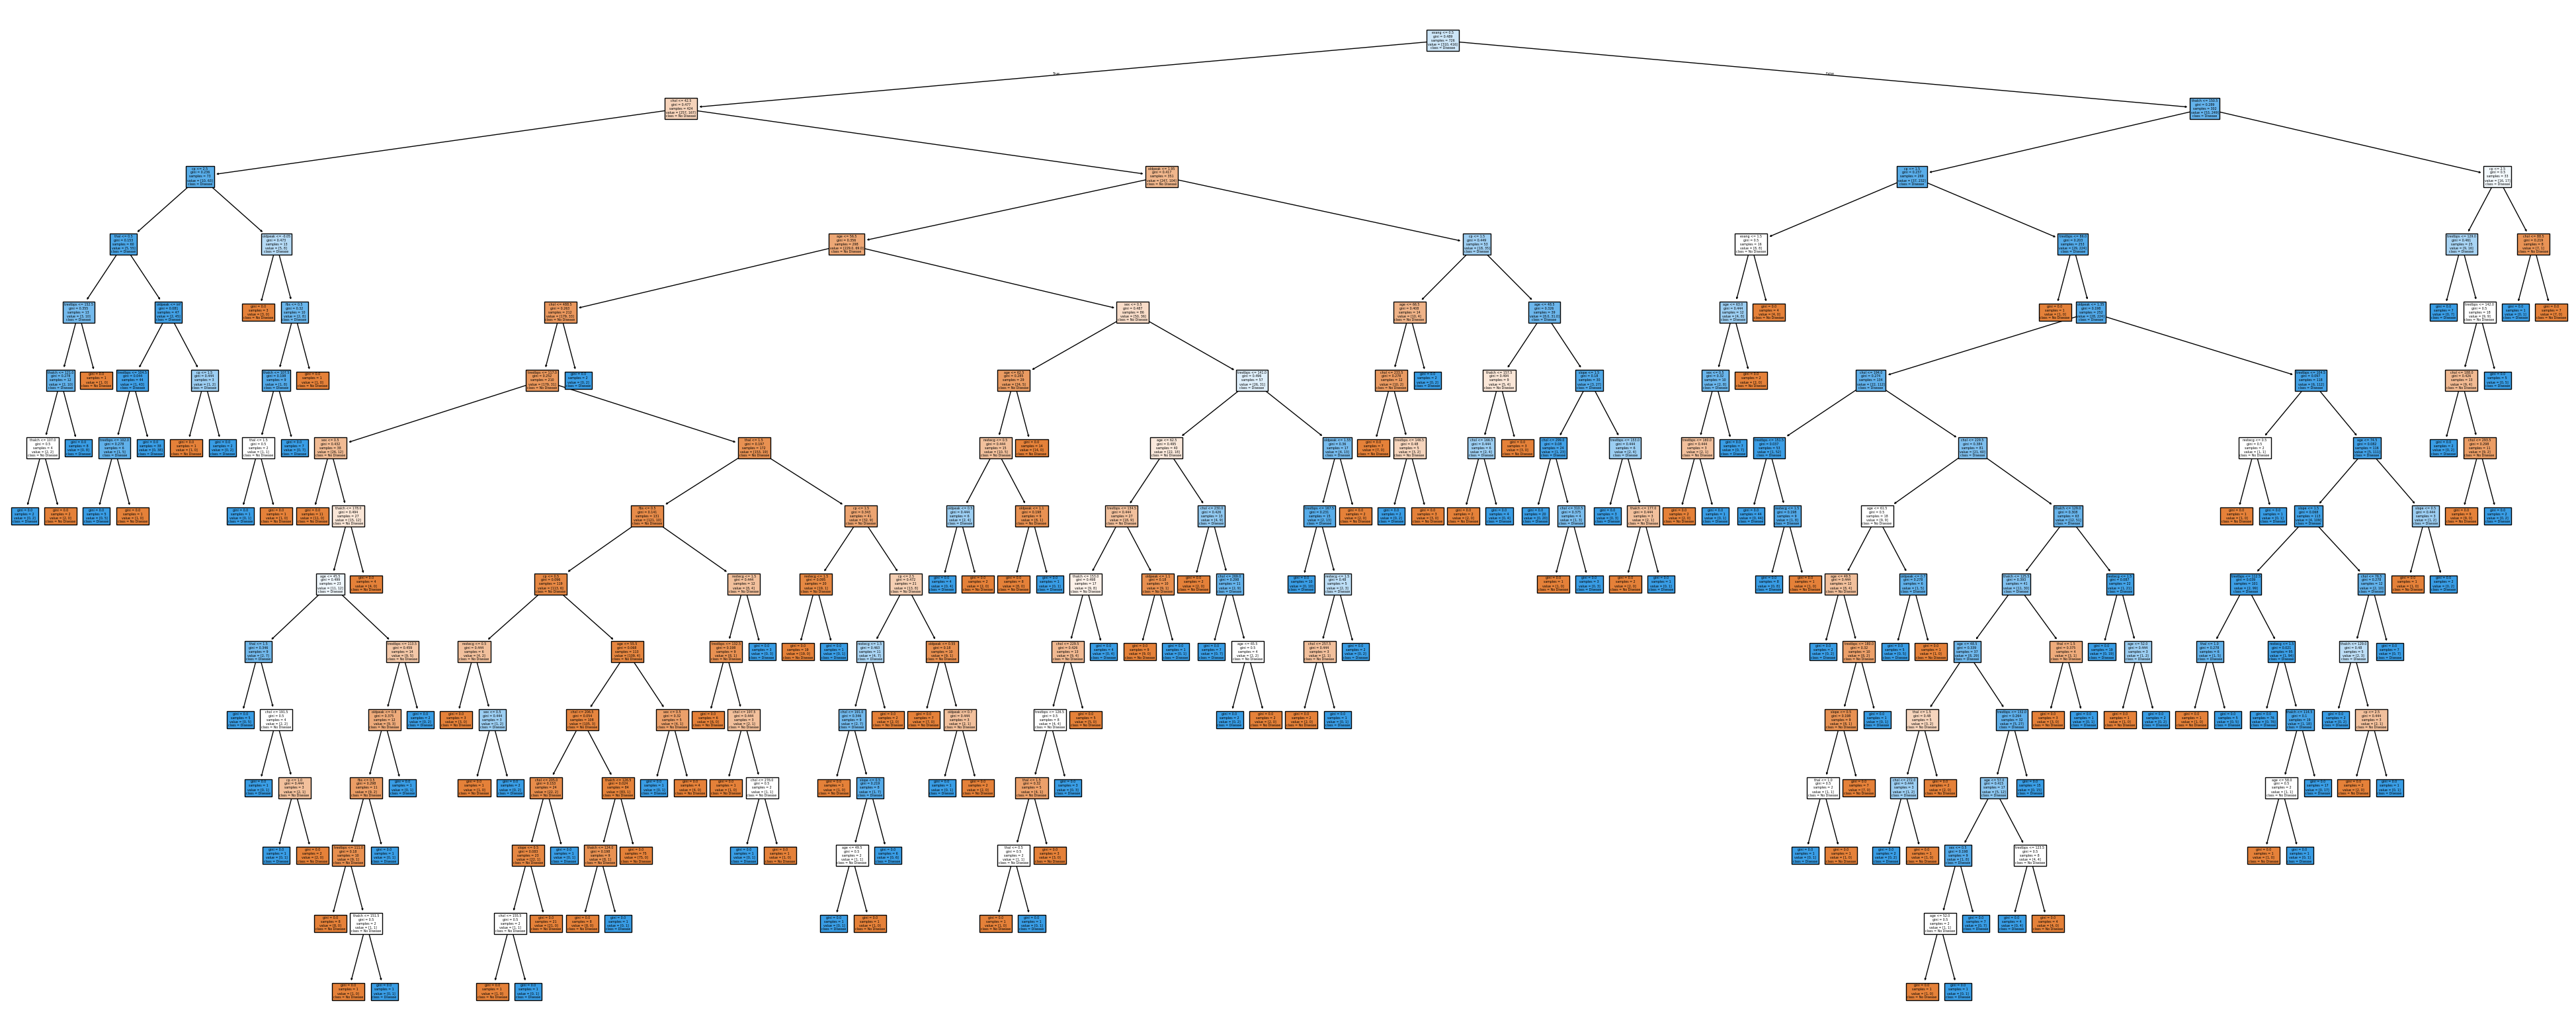

In [44]:
# Visualize the Decision Tree
plt.figure(figsize=(50, 20))
plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=['No Disease', 'Disease'])
plt.show()

In [45]:
# 6. Hyperparameter Tuning with GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [46]:
# Best parameters and model evaluation
best_model = grid_search.best_estimator_
y_best_pred = best_model.predict(X_test)
print("Best Parameters:", grid_search.best_params_)
print("Best Model Accuracy:", accuracy_score(y_test, y_best_pred))
print("Best Model Classification Report:\n", classification_report(y_test, y_best_pred))
print("Best Model ROC-AUC Score:", roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1]))

Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 10}
Best Model Accuracy: 0.7802197802197802
Best Model Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.75      0.77        89
           1       0.77      0.81      0.79        93

    accuracy                           0.78       182
   macro avg       0.78      0.78      0.78       182
weighted avg       0.78      0.78      0.78       182

Best Model ROC-AUC Score: 0.8060891627401233


In [47]:
# Important Features
feature_importances = pd.Series(best_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importances:\n", feature_importances)

Feature Importances:
 exang       0.366774
chol        0.224625
oldpeak     0.116672
age         0.085375
cp          0.080623
trestbps    0.047610
thalch      0.038200
sex         0.028573
fbs         0.007662
thal        0.003887
restecg     0.000000
slope       0.000000
dtype: float64


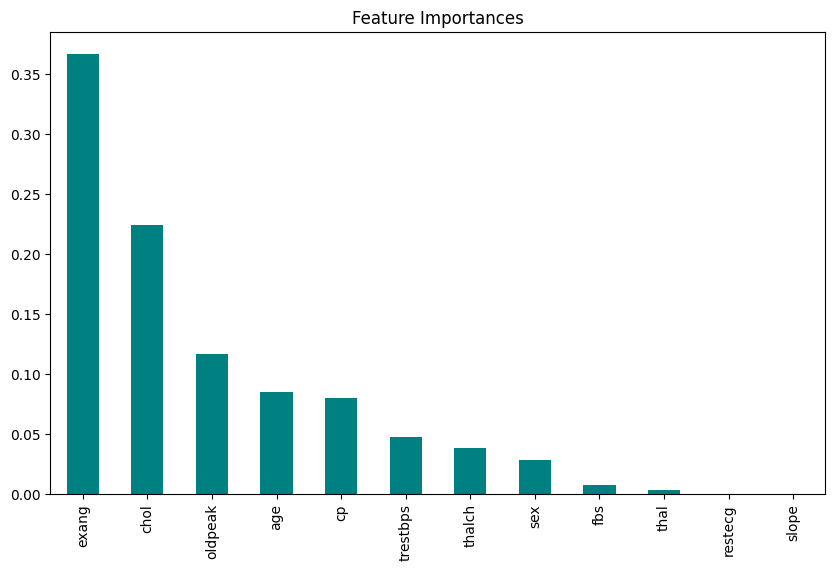

In [48]:
# Plot feature importances
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar', color='teal')
plt.title("Feature Importances")
plt.show()

# Interview Questions:

#(1) What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
Some common hyperparameters for decision tree models include:

max_depth: This sets the maximum depth of the tree, limiting how deep the tree can grow. Controlling the depth helps prevent overfitting (by limiting depth) and underfitting (by allowing more depth). A shallow tree may not capture enough complexity, while a deep tree might capture too much, including noise.

min_samples_split: This is the minimum number of samples required to split a node. Increasing this value helps reduce overfitting by ensuring that nodes have enough data before further splitting. Higher values reduce model complexity, leading to a simpler, more generalized model.

min_samples_leaf: This sets the minimum number of samples that each leaf node must have. By increasing it, you make sure each leaf has sufficient data, which helps reduce variance. If too high, it can lead to underfitting.

criterion: This specifies the function used to measure the quality of a split. Common options include gini (Gini impurity) and entropy (information gain). Different criteria may lead to different splits, impacting the tree’s structure.

max_features: This limits the number of features considered for splitting at each node. Randomly choosing a subset of features at each split can prevent overfitting and reduce variance, especially for high-dimensional data. Lowering this value may decrease computation time but could impact accuracy.

splitter: This defines the strategy used to choose the split at each node. Options include "best" (chooses the best split) and "random" (chooses the best random split), where random splitting can help reduce overfitting, especially in large datasets.

These hyperparameters impact the balance between bias (underfitting) and variance (overfitting) in the model. Tuning these hyperparameters based on the data is essential for optimizing performance.

# (2)What is the difference between Label Encoding and One-Hot Encoding?

Label Encoding:

Assigns each unique category a unique integer value.
Suitable for ordinal data (data with a meaningful order, like small < medium < large).
Creates a single column, saving space.
However, it can mislead models into interpreting the numerical labels as ordinal, even when there isn’t a natural order.

syntax:

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

data['column'] = label_encoder.fit_transform(data['column'])

One-Hot Encoding:

Converts each unique category into a binary vector, where each category is represented by a separate column.
Suitable for nominal data (categories with no inherent order, like colors: red, blue, green).
Prevents the model from assuming any order among categories, as each category is represented independently.
Can lead to high-dimensional data if there are many unique categories (high cardinality), increasing memory usage.

syntax:

from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder()

encoded_data = onehot_encoder.fit_transform(data[['column']]).toarray()

